# Notebook 4 - Clasificación Logística



## 1. Análisis exploratorio.

Hoy vamos a resolver el problema de clasificación sobre el Wisconsin Breast Cancer dataset que hemos visto en la teoría. Al igual que hicimos la semana pasada, cargaremos este conjunto de datos desde un archivo .csv. Sin embargo, en esta ocasión tendréis que descargarlo desde la página web de competiciones de análisis de datos *Kaggle*. 

Esta web es el punto de encuentro ideal para aquellas personas que quieran aprender y mejorar sus habilidades como Data Scientist. No solo cuenta con competiciones mensuales donde puedes probar y picarte con el resto a crear el mejor modelo predictivo (¡y ganar una buena pasta!), sino que también puedes consultar Notebooks Jupyter (llamados Kernels en la web) de otros profesionales de los que puedes aprender su modo de trabajo. Esta web podría considerarse el GitHub de los Data Scientist, y por ello te recomiendo a que participes y aprendas en ella.

Dicho esto, puedes descargarte el dataset que vamos a utilizar a través de este link.Para descargar los datos es necesario registrarse en la web. En caso de que no quisieras, puedes pedir que te facilitemos los datos a través de Slack.
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

**Tu tarea:**
1.  Carga el dataset desde el archivo .csv utilizando **Pandas**  (*pd.read_csv()*) y crea tu matriz de datos de entrada $X$, que contengan las variables que indiquen las propiedades de los núcleos de las células, y el vector de salida $Y$ que contiene la información de si el cancer es benigno ('B') o maligno ('M'). Puedes comprobar en *Kaggle* la información de este dataset.

2. Para el análisis de Machine Learning que vamos a utilizar, es conveniente que nuestor vector $Y$ represente las dos posibles clases con números enteros y no letras. Transforma el contenido de tu vector de salida $Y$ para que contenga un 0 si el cancer es benigno y un 1 si el cancer es maligno. Puede servirte de ayuda utilizar la función ***.map()***.

3. Para analizar si existe alguna relación entre las variables, vamos a calcular la matriz de correlación a pares. Como ya sabes, esto lo puedes hacer usando la función ***numpy.corrcoef***, o si tu dataset es de tipo ***Panda.DataFrame*** con la función ***.corr()***. Visualiza la matriz de correlación obtenida y cuida el estilo para que la visualización pueda ser entendida: nombres de variables en cada eje, tamaño adecuado, barra de color que indique la leyenda utilizada, etc. En este sentido quizás encuentres más cómodo usar la librería de visualización ***Seaborn*** y su función **sb.heatmap()**, que para este caso es mucho más potente.

4. Como hemos visto en la teoría, quizás para resolver un problema de Clasificación no es tan importante saber cuál es la correlación de las variables de entrada. Sin enbargo, muchas de ellas pueden ser innecesarias y perjudicar al rendimiento de nuestro algoritmo a causa de lo que se conoce cómo ***La Maldición de la Dimensionalidad.*** Interpreta la matriz de correlación que has graficado en el apartado 2. ¿Qué patrones identificas?¿Qué pueden significar?

**Ojo!** Al cargar tu dataset, recuerda indicar qué columna contiene los índices de tus datos, con el parámetro *index_col=* para evitar que ***Pandas*** te incluya una columna innecesaria. 

**Extra** Por ejemplo, si quieres ver cómo un experto trata la selección de variables en este dataset (para reducir la dimensionalidad del problema), puedes consultar este notebook en *Kaggle* : [https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization](https://)

In [0]:
import numpy   as np
import scipy   as sc
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:

df = pd.read_csv('data.csv')
#remove unused cols
df = df.drop(['Unnamed: 32'], axis='columns')


Y = df["diagnosis"].map({'M': 1, 'B': 0})
indices = df["id"]
X = df.drop(['diagnosis', 'id'], axis='columns')


# print( [ ( i, X.columns[i] ) for i in range(len(X.columns)) ] )
print(X.columns)

correlations = X.corr()

FileNotFoundError: ignored

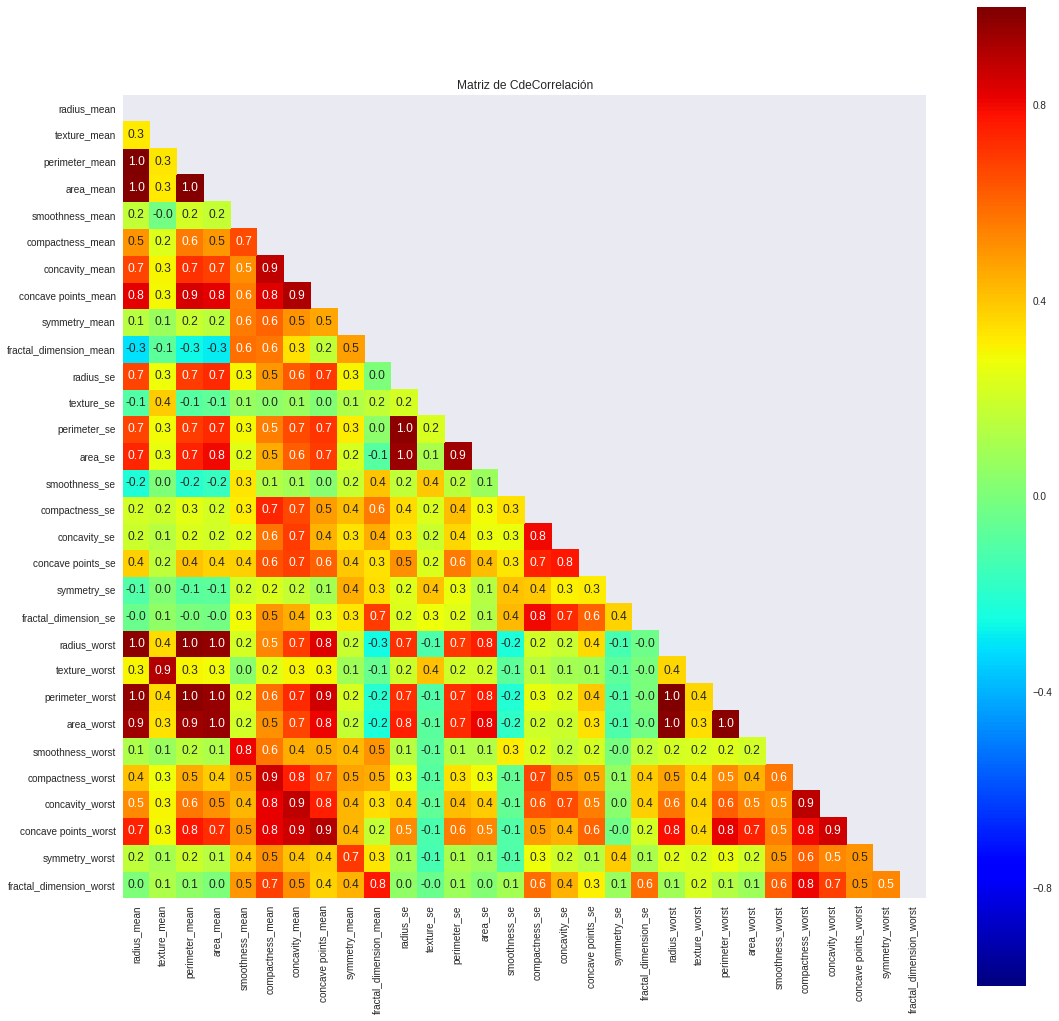

In [0]:


mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(figsize=(18,18))
heatmap = sb.heatmap(correlations, square=True, mask=mask, annot=True, fmt='.1f', cmap='jet')
plt.title("Matriz de CdeCorrelación")
fig.add_subplot(heatmap)
plt.show()



Existen varias variables que tienen mucha correlación porque son medidas muy parecidas.
Parametros como el radius worst y el radius mean tienen una gran correlación, lo que se deduce que lo más habitual es que la media sea el peor caso. Lo mismo sucede con el perimetro.

variables como el perimetro, el area y el radio están también muy relacionadas debido a que las celulas suelen tener la misma forma.

Lo mismo pasa con la concavidad y la compactación, y la concavidad algo menor con el perimetro.

Todas estas variables relacionadas con la forma de la celula están bastante correlacionadas y es posible que se puedan desechar para reducir la dimensionalidad


## 2. Regresión Logística - (Sklearn).

---

**Tu tarea:**
1.  Recuerda que para medir la capacidad de nuestro modelo de poder generalizar sus predicciones y controlar la aparición de ***overfitting***, una manera sencilla (y frecuentemente utilizada), es la de dividir de manera aleatoria tu conjunto de datos en un *dataset de entrenamiento*, con el que se ajusta el modelo, y un *dataset de prueba*, con el que se evalua el modelo. Aquí se comprueba si el modelo generaliza o no, puesto que los datos con los que evaluamos nunca antes ha sido visto por el modelo durante el entrenamiento. En este sentido, utiliza la función ***sklearn.train_test_split()*** para que te genere aleatoriamente un conjunto de datos de entrenamiento y de validación. Busca la manera para que el tamaño de los conjuntos de datos train/test sea de 70%/30%.

2. Utiliza el modelo de Regresión Logística implementado en Sklearn (***sklearn.linear_model.LogisticRegression()***) para elaborar un modelo clasificador binario que utilize tus variables de entrada $X$ para predecir si las celulas identificadas son *Benignas* o *Malignas*. Recuerda entrenar a tu modelo con el conjunto de datos de entrenamiento generados en el *ejercicio 1* y valídalo usando la función ***score()*** sobre el conjunto de datos de validación. Tienes toda la libertad para seleccionar las variables de entrada que consideres más importantes, muchas o pocas, de preprocesarlas como creas razonable o de buscar en Internet otras técnicas que te permitan mejorar así la precisión del modelo. Eso sí, justifica siempre tus decisiones. Mañana comprobaremos entre todos quién ha conseguido la mejor precisión (***score()***) entre todos. ¡Este es el trabajo real de un Data Scientist! 

** Importante:** Fíjate que una vez obtienes un modelo entrenado y lo evaluas con la función ***score()***, cada vez que ejecutes la celda de nuevo, comprobarás que este valor irá cambiando. Esto se produce porque estamos generando una partición aleatoria train/test nueva cada vez que ejecutamos la celda, y por tanto, el rendimiento del modelo va variando. Mañana veremos cómo podemos minimizar esta variabilidad. Sin embargo, la solución para que hoy podamos comparar en igualdad de condiciones, es añadir el atributo *random_state=0* a la función *train_test_split()* para eliminar esa aleatoriedad (OJO! esto no sería una buena práctica en ML)

In [0]:
from sklearn.datasets        import load_iris
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


USE_RANDOM = None

# Usando todas
def all():
  trainX, testX, trainY, testY = train_test_split(X, Y,  random_state=USE_RANDOM)

  lgRgr = LogisticRegression().fit(trainX, trainY)
  return lgRgr.score(testX, testY)


# Quitando las que más tienen correlación a ojo
def test1():
  columns1 = ['radius_mean', 'area_mean', 'perimeter_mean', 'perimeter_worst', 'area_worst', 'area_se', 'perimeter_se']
  X_ = X.drop(columns1, axis='columns')
  
  trainX, testX, trainY, testY = train_test_split(X_, Y,  random_state=USE_RANDOM)

  lgRgr = LogisticRegression().fit(trainX, trainY)
  return lgRgr.score(testX, testY)

  
# filtrando las que tienen más correlación que un máximo (y dejando una)
def filter_correlations(c, columns, max):
  cols = []
  for i in range(len(columns)):
    correlation_over = False
    
    for j in range(int(len(c[i]) / 2)):
      if np.abs(c[i, j]) > max:
        correlation_over = True
        break
    
    if correlation_over:
      cols.append(columns[i])
      
  return cols
    
      
def test2(print_cols):
  
  correlations_cols = filter_correlations(correlations.values, correlations.columns, .95)
  if print_cols:
    print("Columnas eliminadas", correlations_cols)
  X_ = X.drop(correlations_cols, axis='columns')  
  
  X_ = preprocessing.scale(X_) # ¿¿??
  
  trainX, testX, trainY, testY = train_test_split(X_, Y,  random_state=USE_RANDOM)
  
  

  lgRgr = LogisticRegression().fit(trainX, trainY)
  return lgRgr.score(testX, testY)
  

  
print("Score Normal", np.mean( [all() for i in range(200)]))
print("Score Test1", np.mean([test1() for i in range(200)]))
print("Score Test2", np.mean([test2(False) for i in range(200)]))

test2(True)


Score Normal 0.9484265734265734
Score Test1 0.9479370629370629
Score Test2 0.8613286713286713
Columnas eliminadas ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'radius_worst', 'perimeter_worst', 'area_worst']


0.8391608391608392